In [3]:
#this code seems to be working!

from fipy import Grid2D, Grid1D, CellVariable, FaceVariable, Viewer
from fipy import ConvectionTerm, DiffusionTerm, TransientTerm

In [1]:
# Define mesh (3×3 grid)
m = Grid2D(nx=3, ny=3, dx=1.0, dy=1.0)

# Initialize variable
var = CellVariable(mesh=m, value=5.0)

# Define velocity directly on FiPy mesh
velocity = FaceVariable(mesh=m, rank=1)
x, y = m.faceCenters
velocity[0] = x + y  # u = x + y
velocity[1] = x * y  # v = x * y

print(velocity[0])
print(velocity[1])

# Define PDE
eqn = TransientTerm() + ConvectionTerm(velocity) == DiffusionTerm(1.0) #so this now solves du/dt + (x+y)du/dx + (x*y)du/dy = del^2 u

# Time-stepping
for step in range(1):
    eqn.solve(var, dt=1)

# Visualize
viewer = Viewer(var)

NameError: name 'Grid2D' is not defined

[0. 0. 0.]
[[0. 0. 0.]]


C:\Users\Alexa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\fipy\viewers\matplotlibViewer\__init__.py:111: UserWarning: Matplotlib1DViewer efficiency is improved by setting the 'datamax' and 'datamin' keys
  return Matplotlib1DViewer(vars=vars, title=title, axes=axes, **kwlimits)


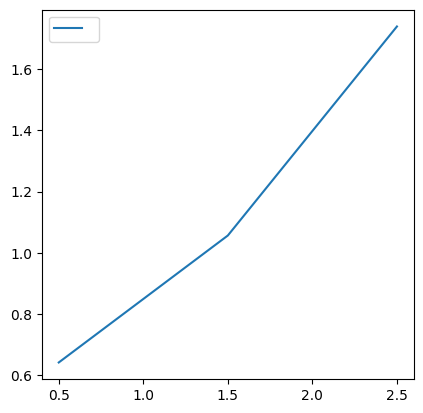

In [75]:
#transforming it into 1D space

m = Grid1D(nx=3, dx=1.0)

# Initialize variable
var = CellVariable(mesh=m, value=0.0)

print(var)

# Define velocity directly on FiPy mesh
velocity = CellVariable(mesh=m, rank=1)

print(velocity)

#var_face = var.faceCenters

velocity[0] = 0.5*(1+var)  # u = 1+var

# Define PDE
eqn = ConvectionTerm(coeff=velocity) == DiffusionTerm(coeff=1)

valueLeft = 0.5
var.constrain(valueLeft, m.facesLeft)

eqn.solve(var)

# Visualize
viewer = Viewer(var)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


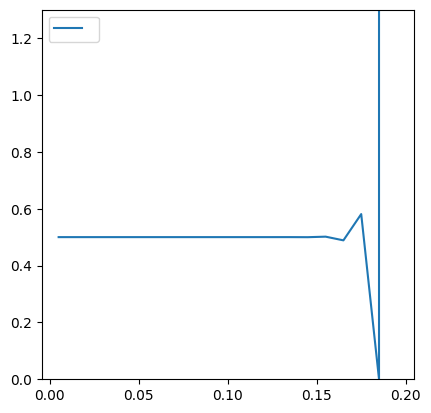

In [77]:
#transforming it into 1D space

m = Grid1D(nx=20, dx=0.01)

# Initialize variable
var = CellVariable(mesh=m, value=0.0)

print(var)

# Define velocity directly on FiPy mesh
velocity = CellVariable(mesh=m, rank=1)

print(velocity)

#boundry conditions
valueLeft = 0.5
var.constrain(valueLeft, m.facesLeft)

for step in range(500):
    # print(var)
    velocity[0] = (1+var)  # u = 0.5+var
    # print(velocity)
    eqn = TransientTerm() + ConvectionTerm(coeff=velocity) == 0
    eqn.solve(var, dt=0.1)

viewer = Viewer(vars=var, datamin=0., datamax=1.3)